### 릿지회귀 = 선형모델 + 가중치 최소화

y = W*x +b
   = w[0]*x[0] + .... w[n]*x[n] + b

w값이 많아지면.. 데이터 적으면 과적합 / 적으면 안 맞을 가능성..

> 특징이 증가하면
>- 특징들 사이의 관계로 인해 다중 공선성
>- 모델이 지나치게 복잡해짐

> 패널티?
>- λ*∑wi^2      
>- λ=조절 모수 ---- 이걸로 과적합을 방지!
>- MSE(=RSS) + 패널티를 최소로 하는 w, b를 찾기

RSS + λ*∑wi^2

- 가중치 w.. 의 절대값을 가능한 작게! 
- w의 모든 원소가 0에 가깝게
- 특성이 출력에 주는 영향 최소한
- 기울기를 작게 : 규제/제약 -> 과대 적합이 되지 않도록 패널티로 강제 제한

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import mglearn

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False  


In [4]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [8]:
#릿지 회귀
#여기서 조절 모수는 alpha.

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)))

print("coef" , ridge.coef_[:5])

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75
coef [-1.41368408 -1.55661895 -1.46543409 -0.12661607 -0.07911936]


In [7]:
#선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

print("coef" , lr.coef_[:5])

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61
coef [-412.7109467   -52.24320682 -131.89881469  -12.00413648  -15.51071293]


In [43]:
#knn회귀
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

훈련 세트 점수: 0.72
테스트 세트 점수: 0.47


테스트 점수에 대해 릿지 > 선형 > knn 순

훈련세트 점수는 선형이 릿지보다 높음.
- 선형모델이 과대적합 됐고 패널티를 통해 릿지에서 과적합 방지된 결과

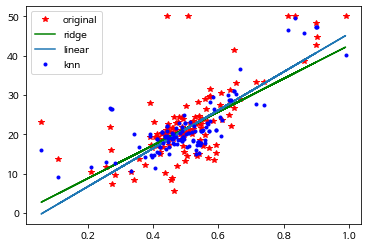

In [38]:
# feature 5 RM!

X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X[:,5].reshape(-1,1), y,random_state=0)

plt.plot(X_test, y_test, 'r*', label="original")

ridge = Ridge().fit(X_train, y_train)
plt.plot(X_test, ridge.predict(X_test), 'g-', label='ridge')

lr = LinearRegression().fit(X_train, y_train)
plt.plot(X_test, lr.predict(X_test), '-', label='linear')


knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
plt.plot(X_test, knn.predict(X_test), 'b.', label='knn')

plt.legend()

In [11]:
print('X.shape : {}'.format(X.shape))
print('X_train.shape : {} X_test.shape : {}'.format(X_train.shape, X_test.shape))

X.shape : (506, 104)
X_train.shape : (379, 104) X_test.shape : (127, 104)


(-5.15, 108.15)

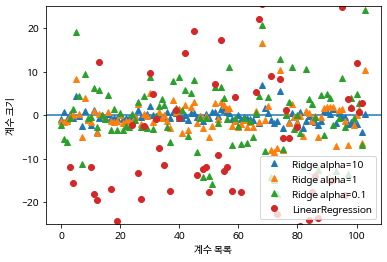

In [12]:
alpha = [10, 1, 0.1]
coef = []

for i in alpha:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    coef.append(ridge.coef_)

#print(coef[0])
for i in range(len(alpha)):
    plt.plot(range(len(X_test[0])), coef[i],'^', label='Ridge alpha={}'.format(alpha[i]))
plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.legend(loc=4)
plt.ylim(-25,25)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)



- linear > 0.1 > 1 > 10

선형보다 패널티가 들어간것이 coef를 줄여줌.

규제가 강화될수록 계수 사이의 가중치들이 줄어드는 것을 확인할 수 있음

Text(0.5, 1.0, '조절 모수에 따른 점수')

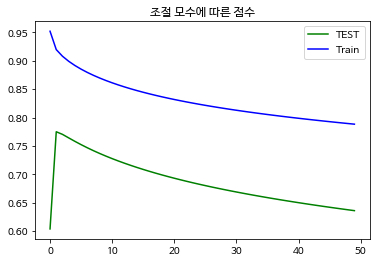

In [34]:
alpha = np.linspace(0,10,num=50)
test = []
train = []

for i in alpha:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    test.append(ridge.score(X_test, y_test))
    train.append(ridge.score(X_train,y_train))

plt.plot(test, 'g-', label='TEST')
plt.plot(train, 'b-' , label='Train')
plt.legend(loc='best')
plt.title("조절 모수에 따른 점수")

조절모수 alpha에 따른 점수들
- alpha = 0일땐 과대적합
- 규제가 들어가면서 테스트 점수는 오르고 훈련 점수는 떨어짐 > 일반화 되는 중
- 규제가 강하게 들어가면 오히려 테스트, 훈련 모두 다 점수가 떨어지는 것을 확인

In [83]:
alpha = [10, 1, 0.1]
inter = []

for i in alpha:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    print("alpha = ", i, "      β0 = {:.2f}".format(ridge.intercept_))
print("linear b = {:.2f}".format(lr.intercept_))





alpha =  10       β0 = 25.01
alpha =  1       β0 = 21.39
alpha =  0.1       β0 = 11.12
linear b = 30.93


alpha = 10의 경우
계수 크기가 거의 0에 수렴.. 영향력이 작아져서 가중치가 줄어들었음

선형회귀보다 패널티가 조금이라도 들어간 0.1의 진폭이 더 작은 것을 확인

intercept의 경우 linear > 10 > 1 > 0.1 순서로
선형이 릿지보다 큰 것을 알 수 있고 릿지간에는 coef와 반대로 alpha가 클수록 intercept도 크다. 

-> βj로 기울기가 커져서 β0는 작아지는..

In [60]:
alpha = [0.01, 0.1, 0.2, 0.3, 0.5, 5, 10]

for i in alpha:
    ridge = Ridge(alpha = i).fit(X_train, y_train)
    print("alpha = {} / train score = {:.2f} , test score = {:.2f}".format(i, ridge.score(X_train,y_train), ridge.score(X_test,y_test)))
          

alpha = 0.01 / train score = 0.94 , test score = 0.70
alpha = 0.1 / train score = 0.93 , test score = 0.77
alpha = 0.2 / train score = 0.92 , test score = 0.77
alpha = 0.3 / train score = 0.91 , test score = 0.77
alpha = 0.5 / train score = 0.90 , test score = 0.77
alpha = 5 / train score = 0.82 , test score = 0.68
alpha = 10 / train score = 0.79 , test score = 0.64


- 0.01 => 과대적합 / 계수 편차가 크다 / 복잡 
- 10 => 과소적합 / 계수 편차가 작다 / 단순

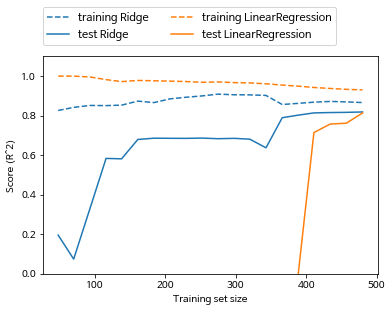

In [4]:
mglearn.plots.plot_ridge_n_samples()

# 선형 모델은 훈련데이터에 대해 성능이 좋지만 과대적합
# 훈련 세트가 커질수록 과대적합이 감소함

# 릿지는 테스트 데이터에 대해 성능이 좋고
# 훈련 세트가 커지면서 규제 효과가 감소

#그래프를 보면 릿지랑 선형이랑 만나는 지점이 생김..
# => 이 정도로 훈련 세트가 커지면 사실상 알파의 영향이 거의 없음..
